In [1]:
%load_ext autoreload
%autoreload 2

In [92]:
import h5py
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.manifold import TSNE
import sys
import tensorflow as tf

sys.path.append('..')
from preprocess import par_transform
import VeryAccurateEmulator as VAE

## Table 1

In [56]:
best = VAE.VeryAccurateEmulator()

In [59]:
lb = best.compute_rms_error(relative=False, flow=50, fhigh=100)
mb = best.compute_rms_error(relative=False, flow=60, fhigh=120)
hb = best.compute_rms_error(relative=False, flow=90, fhigh=200)
wb = best.compute_rms_error(relative=False, flow=50, fhigh=200)
fb = best.compute_rms_error(relative=False)

for b in [fb, lb, mb, hb, wb]:
    print(b.mean())
    print(np.median(b))
    print('\n---------\n')

0.5371503
0.49903005

---------

0.49636072
0.4523543

---------

0.566506
0.51802754

---------

0.9045284
0.78751755

---------

0.70789945
0.6475112

---------



## Figure 3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


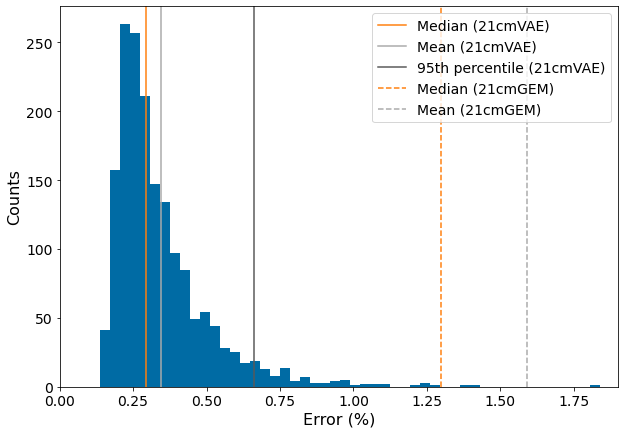

In [114]:
style.use('tableau-colorblind10')
error = best.compute_rms_error()
plt.figure(figsize=(10,7))
plt.hist(100*error, bins=50, color='C0')
plt.axvline(100*np.median(error), label='Median (21cmVAE)', ls='-', color='C1')
plt.axvline(100*np.mean(error), label='Mean (21cmVAE)', ls='-', color='C2')
plt.axvline(100*np.percentile(error, 95), label='95th percentile (21cmVAE)', ls='-', color='C3')
plt.axvline(100*0.0130, label='Median (21cmGEM)', ls='--', c='C1')
plt.axvline(100*0.0159, label='Mean (21cmGEM)', ls='--', color='C2')
plt.xlabel("Error (%)", fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0., 1.9)
plt.savefig('PLOTS/hist.eps')
plt.show()

## Figure 4

In [85]:
signal_test = best.signal_test
par_test = best.par_test
par_labels = [r'$f_*$', r'$V_c$', r'$f_X$', r'$\tau$', r'$\alpha$', r'$\nu_{\mathrm{min}}$', r'$R_{\mathrm{mfp}}$']
predicted_signal = best.predict(par_test)
nu = best.nu_sampling

In [86]:
def get_params_txt(percentile, mean=False, largest=False):
    if percentile > 0:
        p = par_test[error == np.percentile(error, percentile, interpolation='nearest')][0]
    elif mean == True:
        p = par_test[np.argmin(np.abs(error - np.mean(error)))]
    else:
        p = par_test[np.argmax(error)]
  
    s = 'Parameters:\n'
    for i, l in enumerate(par_labels):
        if i == 1:
            line = l + ' = {:.4f} km'.format(p[i])
            line += r'$s^{-1}$'
            line += '\n'
        elif i <=2:
            line = l + ' = {:.4f} \n'.format(p[i])
        elif i == 5:
            line = l + ' = {:.2f} keV\n'.format(p[i])
        elif i == 6:
            line = l + ' = {:.2f} Mpc\n'.format(p[i])    
        else:
            line = l + ' = {:.2f} \n'.format(p[i])
        s += line
    return s

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

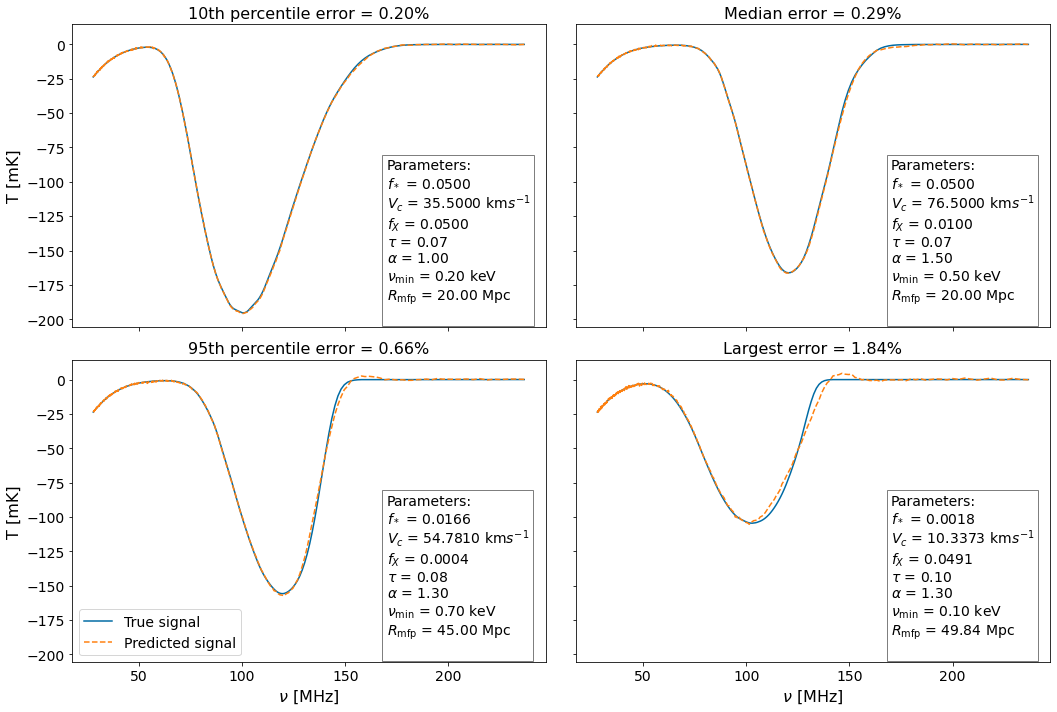

In [115]:
style.use('tableau-colorblind10')
fig, axs = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)
axs[0, 0].plot(nu, signal_test[error == np.percentile(error, 10, interpolation='nearest')][0], label='True signal', color='C0')
axs[0, 0].plot(nu, predicted_signal[error == np.percentile(error, 10, interpolation='nearest')][0], label='Predicted signal', ls='--', color='C1')
axs[0, 0].set_title("10th percentile error = {:.2f}%".format(100*np.percentile(error, 10, interpolation='nearest')), fontsize=16)
#axs[0, 0].text(230, -200, 'a)', fontsize=14)
axs[0, 0].text(170, -200, get_params_txt(10), bbox=dict(facecolor='white', alpha=.5), fontdict={'size'   : 14})

# axs[1, 1].plot(nu, signal_test[error == np.percentile(error, 90, interpolation='nearest')][0], label='True signal')
# axs[1, 1].plot(nu, predicted_signal[error == np.percentile(error, 90, interpolation='nearest')][0], label='Predicted signal', ls='--')
axs[1, 0].set_title("95th percentile error = {:.2f}%".format(100*np.percentile(error, 95, interpolation='nearest')), fontsize=16)
axs[1, 0].plot(nu, signal_test[error == np.percentile(error, 95, interpolation='nearest')][0], label='True signal', color='C0')
axs[1, 0].plot(nu, predicted_signal[error == np.percentile(error, 95, interpolation='nearest')][0], label='Predicted signal', ls='--', color='C1')
#axs[1, 0].text(230, -200, 'c)', fontsize=14)
axs[1, 0].text(170, -200, get_params_txt(95), bbox=dict(facecolor='white', alpha=.5), fontdict={'size'   : 14})
axs[1, 1].plot(nu, signal_test[np.argmax(error)], label='True signal', color='C0')
axs[1, 1].plot(nu, predicted_signal[np.argmax(error)], label='Predicted signal', ls='--', color='C1')
#axs[1, 1].text(230, -200, 'd)', fontsize=14)
axs[1, 1].text(170, -200, get_params_txt(0, largest=True), bbox=dict(facecolor='white', alpha=.5), fontdict={'size'   : 14})
axs[1, 1].set_title("Largest error = {:.2f}%".format(100*np.max(error)), fontsize=16)
# axs[1, 0].plot(nu, signal_test[np.argmin(np.abs(error - np.mean(error)))], label='True signal')
# axs[1, 0].plot(nu, predicted_signal[np.argmin(np.abs(error - np.mean(error)))], label='Predicted signal', ls='--')
axs[0, 1].plot(nu, signal_test[error == np.percentile(error, 50, interpolation='nearest')][0], label='True signal', color='C0')
axs[0, 1].plot(nu, predicted_signal[error == np.percentile(error, 50, interpolation='nearest')][0], label='Predicted signal', ls='--', color='C1')
#axs[0, 1].text(230, -200, 'b)', fontsize=14)
axs[0, 1].text(170, -200, get_params_txt(50), bbox=dict(facecolor='white', alpha=.5), fontdict={'size'   : 14})
axs[0, 1].set_title("Median error = {:.2f}%".format(100*np.percentile(error, 50, interpolation='nearest')), fontsize=16)

for ax in axs.flat:
    ax.set_xlabel(r'$\nu$ [MHz]', fontsize=16)
    ax.set_ylabel('T [mK]', fontsize=16)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
axs[1, 0].legend(loc='best', fontsize=14)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.savefig('PLOTS/comparison.eps')

plt.show()

## Figure 5

In [98]:
last_hidden = tf.keras.models.Model(best.emulator.input, best.emulator.get_layer('em_hidden_layer_3').output)
X_test = par_transform(best.par_test, best.par_train)
latent_direm_TSNE = TSNE(n_components=2, perplexity=200, random_state=42).fit_transform(last_hidden.predict(X_test))

/tmp/ipykernel_400366/947512627.py:4: RuntimeWarning: divide by zero encountered in log10
  color = np.log10(par_test[:, i])
/tmp/ipykernel_400366/947512627.py:11: RuntimeWarning: divide by zero encountered in log10
  color = np.log10(ratio)


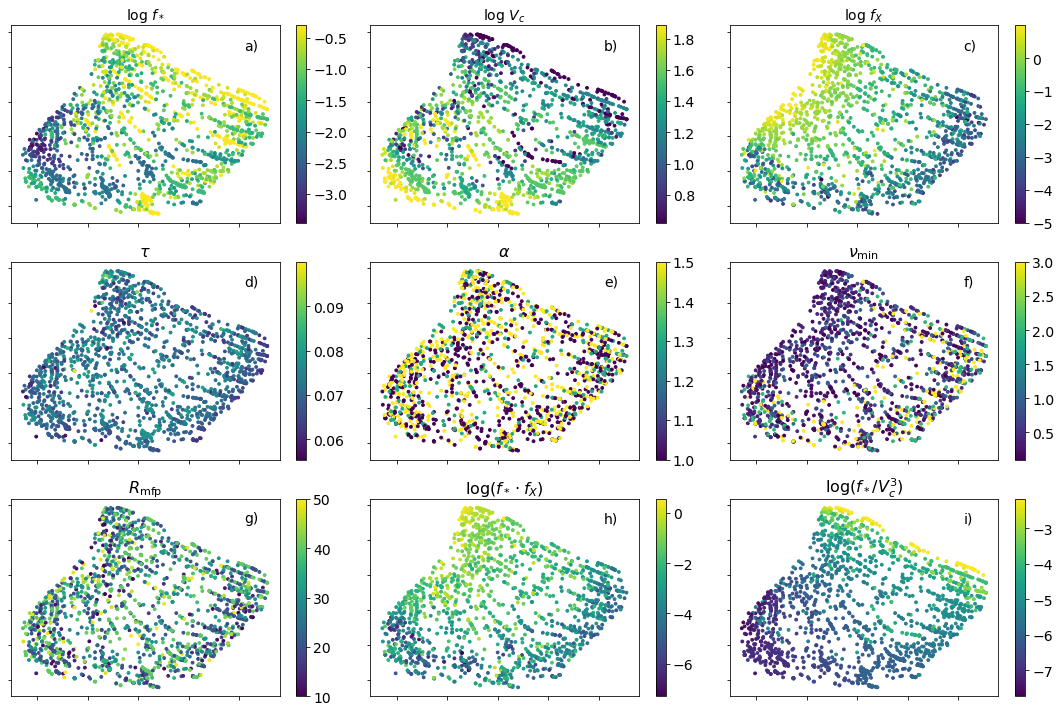

In [116]:
fig, axs = plt.subplots(3, 3, figsize=(15,10), sharex=True, sharey=True)
for i, ax in enumerate(axs.flat):
    if i <= 2:
        color = np.log10(par_test[:, i])
        ax.set_title('log ' + par_labels[i], fontsize=14)
    elif i <= 6:
        color = par_test[:, i]
        ax.set_title(par_labels[i], fontsize=16)
    elif i == 7:
        ratio = par_test[:, 0] * par_test[:, 2] # f* * fx
        color = np.log10(ratio)
        ax.set_title(r'$\log(f_* \cdot f_X)$', fontsize=16)
    else:
        ratio = par_test[:, 0] / par_test[:, 1]**3
        color = np.log10(ratio)
        ax.set_title(r'$\log(f_* / V_c^3)$', fontsize=16)

    im = ax.scatter(latent_direm_TSNE[:,0],latent_direm_TSNE[:,1],c=color, s=8)
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.tick_params(labelsize=14) 
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.text(10.5, 12.5, chr(97+i)+')', fontsize=14)
# # Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.tight_layout()
plt.savefig('PLOTS/tsne.eps')
plt.show()

## Table 2

In [101]:
par_train = best.par_train

In [103]:
def tab2_par_transform(params_train, params_mean):
  '''Take log of three first cols, then map the cols to [-1, 1]'''
  cols12_tr = params_train[:, :2].copy()
  fx_tr = params_train[:, 2].copy()
  fx_tr[fx_tr == 0] = 10**(-6) # to avoid -inf in cases where fx == 0
  newcols12_tr = np.log(cols12_tr)
  newfx_tr = np.log(fx_tr)

  cols123_mean = params_mean[:3].copy()
  newcols123_mean = np.log(cols123_mean)

  newparams_tr = np.empty(params_train.shape)
  newparams_tr[:, :2] = newcols12_tr
  newparams_tr[:, 2] = newfx_tr
  newparams_tr[:, 3:] = params_train[:, 3:].copy()

  newparams_mean = np.empty((1, 7))
  newparams_mean[:, :3] = newcols123_mean
  newparams_mean[:, 3:] = params_mean[3:].copy()

  maximum = np.max(newparams_tr, axis=0)
  minimum = np.min(newparams_tr, axis=0)

  newparams_mean -= minimum
  newparams_mean /= (maximum - minimum)
  newparams_mean = 2*newparams_mean - 1

  return tf.convert_to_tensor(newparams_mean), maximum-minimum

In [105]:
# compute derivative of the mean training signal with respect to the params
mean_params = par_train.mean(axis=0)
mean_params_proc, mm = tab2_par_transform(par_train, mean_params)
# mean_params = tf.expand_dims(tf.convert_to_tensor(X_train.mean(axis=0)), axis=0)
with tf.GradientTape() as t:
    t.watch(mean_params_proc)
    mean_signal = best.emulator(mean_params_proc)
    # unpreprocess the mean signal
    mean_signal *= np.std(signal_train)
    mean_signal += np.mean(signal_train, axis=0)

# jacobian, has shape (451, 7) = derivative at each z wrt each param
gradients = t.batch_jacobian(mean_signal, mean_params_proc).numpy()[0]

In [106]:
def transform_gradients(grad):
  """
  Tf returns gradients wrt preprocessed signals, but some chain rule gives
  grads wrt the log of the physical params (which is what we want)
  """
  # the first three are already in log from the transform
  grad123 = gradients[:, :3].copy()
  physical_grad123 = grad123 * 2/mm[:3]  # mm = max-min from par transform

  grad_rest = gradients[:, 3:].copy()
  physical_grad_rest = grad_rest * 2/mm[3:] * mean_params[3:]

  physical_gradients = np.concatenate((physical_grad123, physical_grad_rest),
                                      axis=1)
  return physical_gradients

In [107]:
physical_gradients = transform_gradients(gradients)

In [108]:
def grad_combinations(physical_grads):
  """
  We also want derivatives wrt log(f*fX) and log(f*/Vc3)
  """
  dT_dlog_fs = physical_gradients[:, 0]
  dT_dlog_Vc = physical_gradients[:, 1]
  dT_dlog_fx = physical_gradients[:, 2]
  # log f* fX
  comb1 = dT_dlog_fs + dT_dlog_fx
  # log f*/Vc3
  comb2 = dT_dlog_fs - dT_dlog_Vc/3
  return comb1, comb2

gradcomb1, gradcomb2 = grad_combinations(physical_gradients)

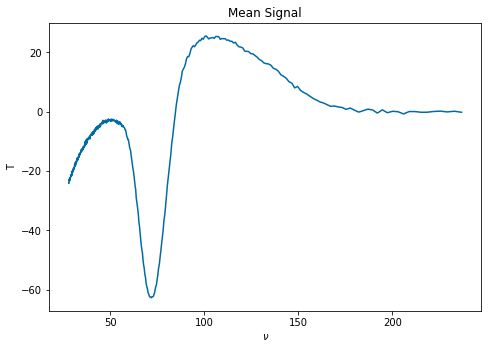

In [110]:
fig = plt.figure()
ax = fig.add_axes([1, 2.2, 1., 1.])
ax.plot(nu, mean_signal[0])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel('T')
ax.set_title('Mean Signal')
plt.show()

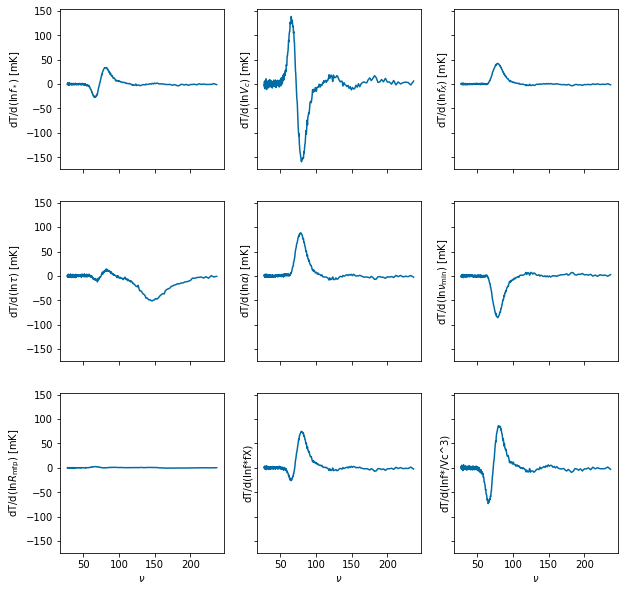

In [111]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True,
                        figsize=(10,10))
for i in range(7):
  ax = axs[i // 3, i % 3]
  ax.plot(nu, physical_gradients[:, i])
  ax.set_ylabel('dT/d(ln'+par_labels[i]+') [mK]')
for i in range(3):
  axs[-1, i].set_xlabel(r'$\nu$')

ax8 = axs[-1, -2]
ax8.plot(nu, gradcomb1)
ax8.set_ylabel('dT/d(lnf*fX)')
ax9 = axs[-1, -1]
ax9.plot(nu, gradcomb2)
ax9.set_ylabel('dT/d(lnf*/Vc^3)')
plt.show()

In [112]:
allgrads = np.concatenate((physical_gradients, 
                           np.expand_dims(gradcomb1, axis=1), 
                           np.expand_dims(gradcomb2, axis=1)),
                          axis=1)
def compute_rms(grads, nu_min=50, nu_max=100):
  indices = np.argwhere((nu >= nu_min) & (nu <= nu_max))[:, 0]
  grads_in_band = grads[indices]

  s = grads_in_band ** 2
  ms = np.mean(s, axis=0)
  rms = np.sqrt(ms)

  return rms

In [113]:
rms_lowband = compute_rms(allgrads)
print(rms_lowband)

rms_midband = compute_rms(allgrads, 60, 120)
print(rms_midband)

rms_highband = compute_rms(allgrads, 90, 200)
print(rms_highband)

rms_large = compute_rms(allgrads, 50, 200)
print(rms_large)

rms_all = compute_rms(allgrads, nu.min(), nu.max())
print(rms_all)

[17.30733074 81.9689995  18.71427124  5.53832774 39.48204893 37.77203513
  1.04494047 32.24036034 44.5282597 ]
[18.90828658 88.84296712 20.5432698   6.96792714 43.32945018 41.46172465
  1.14064079 35.37569823 48.39925139]
[ 4.88249341 15.52965956  4.17218247 25.2537985   8.46477298  8.45671026
  0.53161447  9.01152813  9.86540119]
[14.19570779 67.13282357 15.31434334 16.65836366 32.31641948 30.91390138
  0.89384643 26.42612217 36.47285265]
[ 9.77075995 46.21285034 10.53420697 11.51681867 22.2283948  21.26445178
  0.62282846 18.18613194 25.10546208]


## Figure 6

In [29]:
em_dist = np.load('nov8_manyems.npy') * 100
ae_em_dist = np.load('nov8_manyaeems.npy') * 100

mean_em = np.mean(em_dist, axis=1)
mean_ae_em = np.mean(ae_em_dist, axis=1)

median_em = np.median(em_dist, axis=1)
median_ae_em = np.median(ae_em_dist, axis=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


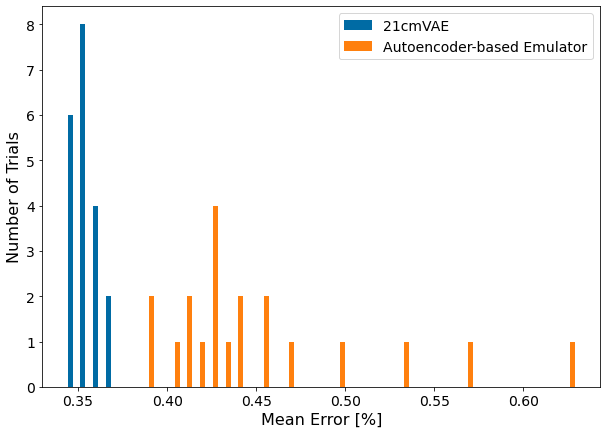

In [117]:
plt.figure(figsize=(10, 7))
plt.hist([mean_em, mean_ae_em], label=['21cmVAE', 'Autoencoder-based Emulator'], bins=40)
plt.legend(fontsize=14)
plt.xlabel('Mean Error [%]', fontsize=16)
plt.ylabel('Number of Trials', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('PLOTS/error_distribution.eps')
plt.show()

In [31]:
print(np.mean(mean_em))
print(np.std(mean_em)/np.sqrt(20))

print(np.mean(mean_ae_em))
print(np.std(mean_ae_em)/np.sqrt(20))

0.35411484360274315
0.0014842858661764477
0.45290856571432736
0.01333506094471459


In [32]:
print(np.mean(median_em))
print(np.std(median_em)/np.sqrt(20))

print(np.mean(median_ae_em))
print(np.std(median_ae_em)/np.sqrt(20))

0.30488991760648787
0.0014724734680355738
0.39924324373714626
0.011223751068959594


In [33]:
idx = mean_em.argmin()
print(mean_em[idx])
print(median_em[idx])

idx2 = mean_ae_em.argmin()
print(mean_ae_em[idx2])
print(median_ae_em[idx2])

0.3434216264501966
0.29414279852062464
0.3919982397887843
0.3513658884912729


## Figure 7

In [11]:
with h5py.File('../dataset_21cmVAE.h5', 'r') as hf:
    signal_train = hf['signal_train'][:]
total_train_set = np.shape(signal_train)[0]

In [26]:
loss = np.load('emulator_loss.npy')
N_runs, runs_per_frac = loss.shape[:2]
frac_values = np.arange(1, N_runs+1)/N_runs
test_loss = loss[:, :, -1] * 100  # in %
test_loss_avg = np.mean(test_loss, axis=1)
test_loss_std = np.std(test_loss, axis=1)
test_loss_err = test_loss_std/np.sqrt(runs_per_frac)

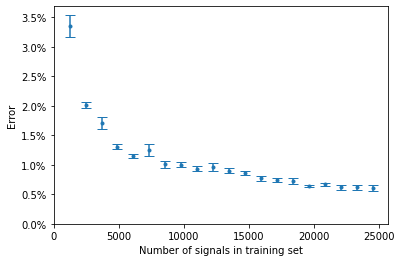

In [28]:
plt.figure()
plt.errorbar(frac_values*total_train_set, test_loss_avg, yerr=test_loss_err, fmt='.', capsize=5)
plt.xlabel('Number of signals in training set')
plt.ylabel('Error')
plt.ylim(0)
plt.xlim(0)
yt = np.arange(0, 4, 0.5)
plt.yticks(yt, [str(t) + '%' for t in yt])
plt.xticks(fontsize=14)
plt.show()